In [5]:
package_jar = '../target/spark-sql-flow-plugin_2.12_spark3.2_1.0.0-SNAPSHOT-with-dependencies.jar'

In [6]:
import numpy as np
import pandas as pd
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql import functions as f

spark = SparkSession.builder \
    .config('spark.jars', package_jar) \
    .config('spark.deriver.memory', '8g') \
    .enableHiveSupport() \
    .getOrCreate()

In [8]:
spark.sql("CREATE TABLE IF NOT EXISTS TestTable (key INT, value INT)")
spark.sql("CREATE TEMPORARY VIEW TestView1 AS SELECT key, SUM(value) s FROM TestTable GROUP BY key")
spark.sql("CACHE TABLE TestView1")
spark.sql("CREATE TEMPORARY VIEW TestView2 AS SELECT t.key, t.value, v.s FROM TestTable t, TestView1 v WHERE t.key = v.key")

22/01/05 11:10:08 WARN ResolveSessionCatalog: A Hive serde table will be created as there is no table provider specified. You can set spark.sql.legacy.createHiveTableByDefault to false so that native data source table will be created instead.
22/01/05 11:10:09 WARN SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
22/01/05 11:10:09 WARN HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
22/01/05 11:10:09 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
22/01/05 11:10:09 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist


DataFrame[]

In [9]:
from auto_tracking import save_data_lineage
save_data_lineage('/tmp/networkx_example', graph_format='adjacency_list', contracted=False, overwrite=True, options='sep=|')

22/01/05 11:10:17 WARN ObjectStore: Failed to get database global_temp, returning NoSuchObjectException


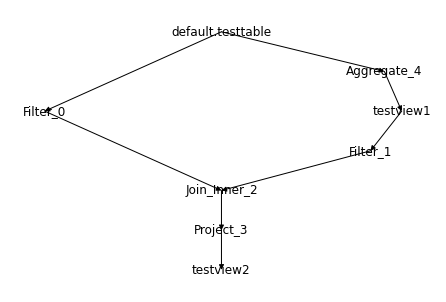

In [18]:
import networkx as nx

g = nx.read_edgelist('/tmp/networkx_example/sqlflow.lst', create_using=nx.DiGraph, delimiter='|')
pos = nx.nx_pydot.graphviz_layout(g, prog='dot')  # ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’
nx.draw(g, with_labels=True, pos=pos, node_shape='o', node_color='black', node_size=0)